V3: This notebook will have different models to answer different questions

1. What is the zip code with the higher house prices? 
* This model will have the testing data separated from training data


## Final Project Submission

Please fill out:
* Student name: Francis Morales
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [1]:
#Make notebook wider
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# 1. Inspecting, Cleaning and Preparing the Dataset

### 1.1 Use the dataframe.info(), dataframe.describe(), dataframe.isna() methods and print unique values to get an inital sense of the data. Remove duplicate data.

* ['waterfront', 'view', 'yr_renovated'] --> missing values, need to inspect further
* ['date', 'sqft_basement'] --> are saved as object, might have to convert to a different value_type
* ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'] --> Might be able to convert those variables to categories
* 177 rows with duplicate data were identified and removed from dataset.

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('kc_house_data.csv')

In [3]:
#Check for duplicated data
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [4]:
df.drop_duplicates(subset='id', keep='first', inplace=True)
#Check the new number of rows
df['id'].count()

21420

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Check the number of NaNs in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#Examine the unique values in each column to look for placeholders or unlikely data
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/26/2014     0.006116
6/25/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.249860
1

### 1.2 Further inspect the data looking for NaNs and placeholder values. Apply data cleaning procedures described in notes below. Convert variables to appropriate data types.

* ['waterfront']: median = 0 // 99% of the houses with data have ['waterfront'] = 0; therefore, for the NaNs in this variable, I will be assigning ['waterfront'] = 0
* ['view']: median = 0 // 90% of the houses with data have ['view']= 0; therefore, I will be assigning ['view'] = 0 to the NaNs in this variable.
* ['yr_renovated']: median = 0 // 95.7% of the houses with data have ['yr_renovated'] = 0; therefore, for the NaNs in this variable I will be assigning ['yr_renovated'] = 0
* ['yr_renovated']: will transform this variable into a categorical one where ['yr_renovated']=0 if not renovated and ['yr_renovated']=1 if renovated -- this based on 95% of houses have never been renovated and makes more sense to transform to a category
* ['sqft_basement'] has a placeholder "?" representing 2% of the total values. Will calculate the median value of the houses with data and will replace with the calculated median value.
* Data Type transformation:
        -['date']: apply pandas.to_datetime
        -['waterfront', 'yr_renovated', 'zipcode', 'view', 'condition', 'grade']: change to category

In [9]:
#Handling NaNs
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#Handling placeholder value in 'sqft_basement'
df2 = df.loc[df['sqft_basement'] != '?'].copy()
df2['sqft_basement'] = pd.to_numeric(df2['sqft_basement'])
median1 = df2['sqft_basement'].median()
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = median1
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#Converting values != 0 into 1 for 'yr_renovated'
df['yr_renovated'].loc[df['yr_renovated'] != 0] = 1

#Handling data type in date
df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = df['zipcode'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['yr_renovated'] = df['yr_renovated'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 1.3 Confirm assumptions

# 2. Model 1: Whats Zip Code Area has the best house appraisal? 
*Using dummy variables for each zipcode

### 2.1 Select variables and create dummies for Model 1 

In [10]:
#Create dummies for each zip code
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')

In [11]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model = df[['price', 'sqft_lot', 'sqft_living']].copy()
df_model = pd.concat([df_model, zipcode_dummies], axis=1) 
df_model = df_model.drop(['zipcode_98039'], axis=1) #dropped the zipcode with lowest data available since we created categories

### 2.2 Train/test split

*  Use Scikit-Learn library:  train_test_split method to train/test split our dataset

In [12]:
y = df_model['price']
x= df_model.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 71) (17136,)
(4284, 71) (4284,)


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 2.3 Generate Model1 and perform feature engineering
Three versions resulted from this process

#### Model 1 - version 1

Generate version1 of Model1

In [13]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     662.7
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:24:45   Log-Likelihood:            -2.3240e+05
No. Observations:               17136   AIC:                         4.649e+05
Df Residuals:                   17064   BIC:                         4.655e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.123e+06   2.98e+04     37.751      0.000    1.06e+06    1.18e+06
sqft_lot          0.2966      0.037      7.957      0.000       0.224       0.370
sqft_living     249.2846      1.758    141.827      0.000     245.839     252.730
zipcode_98001 -1.327e+06   3.14e+04    -42.265      0.000   -1.39e+06   -1.27e+06
zipcode_98002 -1.294e+06   3.29e+04    -39.329      0.000   -1.36e+06   -1.23e+06
zipcode_98003 -1.312e+06   3.19e+04    -41.166      0.000   -1.37e+06   -1.25e+06
zipcode_98004 -4.874e+05   3.14e+04    -15.542      0.000   -5.49e+05   -4.26e+05
zipcode_98005 -9.869e+05   3.35e+04    -29.494      0.000   -1.05e+06   -9.21e+05
zipcode_98006 -9.967e+05   3.06e+04    -32.568      0.000   -1.06e+06   -9.37e+05
zipcode_98007 -1.062e+06   3.45e+04    -30.768      0.000   -1.13e+06   -9.94e+05
zipcode_98008 -1.022e+06   3.17e+04    -32.207      0.000   -1.08e+06    -9.6e+05
zipcode_98010 -1.253e+06   3.61e+04    -34.725      0.000   -1.32e+06   -1.18e+06
zipcode_98011 -1.202e+06   3.31e+04    -36.336      0.000   -1.27e+06   -1.14e+06
zipcode_98014 -1.207e+06   3.49e+04    -34.558      0.000   -1.27e+06   -1.14e+06
zipcode_98019  -1.25e+06   3.29e+04    -38.031      0.000   -1.31e+06   -1.19e+06
zipcode_98022 -1.291e+06   3.22e+04    -40.065      0.000   -1.35e+06   -1.23e+06
zipcode_98023 -1.338e+06   3.07e+04    -43.595      0.000    -1.4e+06   -1.28e+06
zipcode_98024 -1.173e+06   3.77e+04    -31.108      0.000   -1.25e+06    -1.1e+06
zipcode_98027 -1.142e+06   3.09e+04    -36.914      0.000    -1.2e+06   -1.08e+06
zipcode_98028 -1.189e+06   3.17e+04    -37.575      0.000   -1.25e+06   -1.13e+06
zipcode_98029 -1.082e+06   3.14e+04    -34.508      0.000   -1.14e+06   -1.02e+06
zipcode_98030 -1.324e+06   3.21e+04    -41.283      0.000   -1.39e+06   -1.26e+06
zipcode_98031 -1.311e+06   3.19e+04    -41.150      0.000   -1.37e+06   -1.25e+06
zipcode_98032 -1.304e+06   3.47e+04    -37.552      0.000   -1.37e+06   -1.24e+06
zipcode_98033 -9.246e+05   3.09e+04    -29.951      0.000   -9.85e+05   -8.64e+05
zipcode_98034   -1.1e+06   3.06e+04    -35.988      0.000   -1.16e+06   -1.04e+06
zipcode_98038 -1.301e+06   3.05e+04    -42.706      0.000   -1.36e+06   -1.24e+06
zipcode_98040 -7.321e+05   3.17e+04    -23.118      0.000   -7.94e+05    -6.7e+05
zipcode_98042 -1.311e+06   3.06e+04    -42.868      0.000   -1.37e+06   -1.25e+06
zipcode_98045 -1.214e+06   3.25e+04    -37.352      0.000   -1.28e+06   -1.15e+06
zipcode_98052  -1.07e+06   3.04e+04    -35.205      0.000   -1.13e+06   -1.01e+06
zipcode_98053 -1.108e+06    3.1e+04    -35.788      0.000   -1.17e+06   -1.05e+06
zipcode_98055 -1.265e+06   3.21e+04    -39.475      0.000   -1.33e+06    -1.2e+06
zipcode_98056 -1.211e+06    3.1e+04    -39.081      0.000   -1.27e+06   -1.15e+06
zipcode_98058 -1.288e+06   3.08e+04    -41.757   

Plot residuals of version1 to see if they follow a normal distribution

In [14]:
version1_resid = linreg.resid

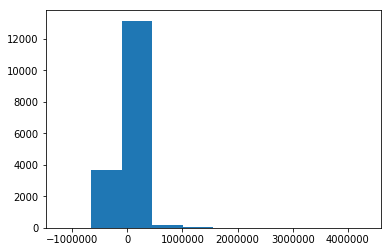

In [15]:
#Histogram of residuals
plt.hist(version1_resid)
plt.show()

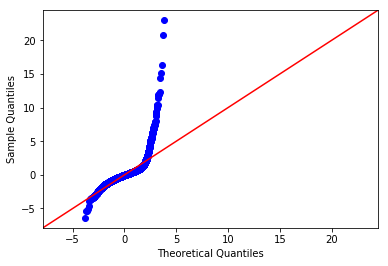

In [16]:
#QQ Plot of residuals
sm.graphics.qqplot(version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 1 conclusion:
        -This model was built on training data without transformation
        -Residuals do not follow a normal distribution as confirmed by qq plot, therefore this is not a reliable Model and need to try some transformations to normalize residuals



#### Model 1 - version 2

Will transform variables to see if residuals normalize

In [17]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

Check multicollinearity after normalization: no multicollinearity found between independent variables

In [18]:
X.corr() > 0.75

,const,sqft_lot,sqft_living,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
const,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98001,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98002,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98003,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98004,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98005,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98006,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98007,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


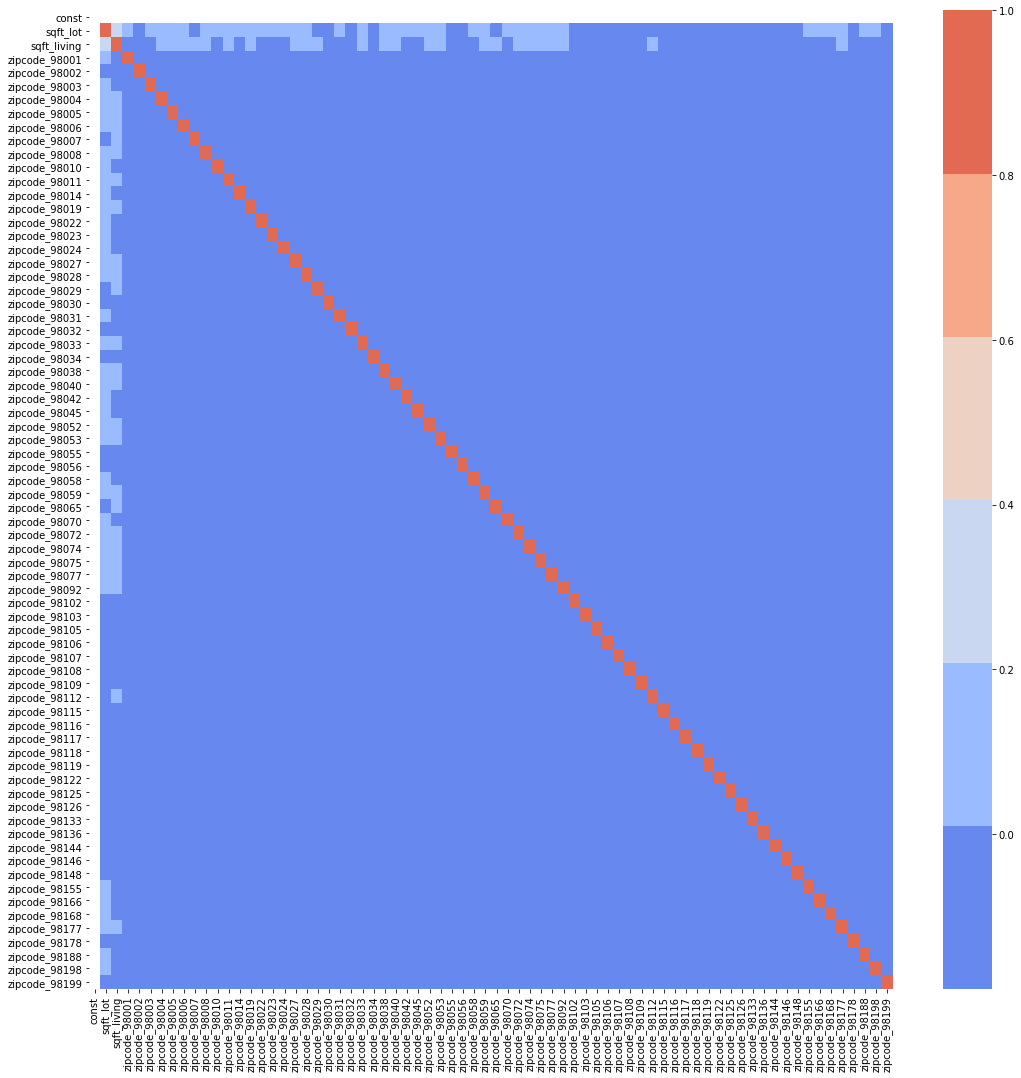

In [19]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

Generate version2 of model

In [20]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:24:49   Log-Likelihood:                 1736.9
No. Observations:               17136   AIC:                            -3330.
Df Residuals:                   17064   BIC:                            -2772.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0249      0.051    157.468      0.000       7.925       8.125
sqft_lot          0.0696      0.002     28.835      0.000       0.065       0.074
sqft_living       0.7056      0.005    155.290      0.000       0.697       0.715
zipcode_98001    -1.4743      0.036    -40.431      0.000      -1.546      -1.403
zipcode_98002    -1.4831      0.038    -38.789      0.000      -1.558      -1.408
zipcode_98003    -1.4063      0.037    -37.965      0.000      -1.479      -1.334
zipcode_98004    -0.2228      0.036     -6.104      0.000      -0.294      -0.151
zipcode_98005    -0.6671      0.039    -17.144      0.000      -0.743      -0.591
zipcode_98006    -0.6908      0.036    -19.399      0.000      -0.761      -0.621
zipcode_98007    -0.7720      0.040    -19.238      0.000      -0.851      -0.693
zipcode_98008    -0.7486      0.037    -20.295      0.000      -0.821      -0.676
zipcode_98010    -1.2211      0.042    -29.107      0.000      -1.303      -1.139
zipcode_98011    -0.9980      0.038    -25.954      0.000      -1.073      -0.923
zipcode_98014    -1.1568      0.041    -28.540      0.000      -1.236      -1.077
zipcode_98019    -1.1581      0.038    -30.327      0.000      -1.233      -1.083
zipcode_98022    -1.3713      0.037    -36.706      0.000      -1.444      -1.298
zipcode_98023    -1.4639      0.036    -41.051      0.000      -1.534      -1.394
zipcode_98024    -1.0564      0.044    -24.119      0.000      -1.142      -0.971
zipcode_98027    -0.8953      0.036    -24.887      0.000      -0.966      -0.825
zipcode_98028    -1.0298      0.037    -27.996      0.000      -1.102      -0.958
zipcode_98029    -0.7619      0.037    -20.863      0.000      -0.833      -0.690
zipcode_98030    -1.4137      0.037    -37.931      0.000      -1.487      -1.341
zipcode_98031    -1.3894      0.037    -37.541      0.000      -1.462      -1.317
zipcode_98032    -1.4827      0.040    -36.728      0.000      -1.562      -1.404
zipcode_98033    -0.6020      0.036    -16.768      0.000      -0.672      -0.532
zipcode_98034    -0.8935      0.036    -25.152      0.000      -0.963      -0.824
zipcode_98038    -1.2788      0.035    -36.144      0.000      -1.348      -1.209
zipcode_98040    -0.4178      0.037    -11.337      0.000      -0.490      -0.346
zipcode_98042    -1.3787      0.036    -38.801      0.000      -1.448      -1.309
zipcode_98045    -1.1251      0.038    -29.811      0.000      -1.199      -1.051
zipcode_98052    -0.7695      0.035    -21.782      0.000      -0.839      -0.700
zipcode_98053    -0.8266      0.036    -22.973      0.000      -0.897      -0.756
zipcode_98055    -1.3092      0.037    -35.139      0.000      -1.382      -1.236
zipcode_98056    -1.1037      0.036    -30.637      0.000      -1.174      -1.033
zipcode_98058    -1.2864      0.036    -35.904   

Plot residuals of version2 to see if they follow a normal distribution

In [21]:
version2_resid = linreg.resid

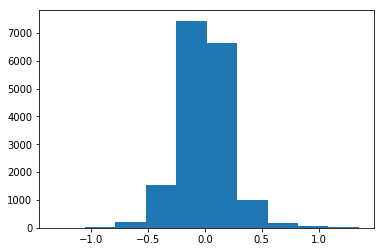

In [22]:
#Histogram of residuals
plt.hist(version2_resid)
plt.show()

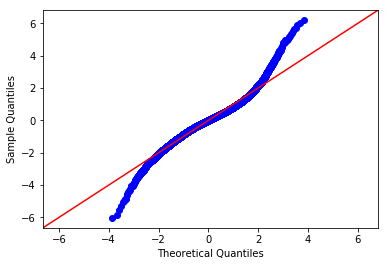

In [23]:
#QQ Plot of residuals
sm.graphics.qqplot(version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 2 concusion:
      -Log transformed my continuous variables to help normalize residual distr and get a better kurtosis/JB 
      -Confirmed that there is no multicollinearity between independent variables after transformation
      -QQ plot showed a better normal distribution of residuals compared to version 1 BUT distribution is still not normal; therefore, model is not reliable

#### Model 1 - version 3

Will do stepwise regression and see if residual distribution gets better

In [24]:
#Model Fit: Stepwise Regression
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [25]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

Add  const                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98004                  with p-value 4.85503e-187
Add  zipcode_98023                  with p-value 2.06677e-166
Add  zipcode_98042                  with p-value 4.82341e-134
Add  zipcode_98001                  with p-value 1.57261e-132
Add  zipcode_98112                  with p-value 1.40687e-123
Add  zipcode_98092                  with p-value 4.48719e-116
Add  zipcode_98038                  with p-value 1.17283e-120
Add  zipcode_98003                  with p-value 1.08813e-104
Add  zipcode_98030                  with p-value 3.05482e-110
Add  zipcode_98058                  with p-value 1.23472e-113
Add  zipcode_98031                  with p-value 1.09762e-120
Add  zipcode_98002                  with p-value 1.02109e-127
Add  zipcode_98168                  with p-value 9.75093e-130
Add  zipcode_98198                  with p-value 1.74219e-116
Add  zipcode_98055        

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zipcode_98029                  with p-value 5.85185e-07
Drop zipcode_98144                  with p-value 0.976191
Add  zipcode_98008                  with p-value 3.04418e-07
Drop zipcode_98005                  with p-value 0.79323
Add  zipcode_98007                  with p-value 1.39244e-07
Drop zipcode_98136                  with p-value 0.757722
Add  zipcode_98006                  with p-value 4.6913e-06
Drop zipcode_98033                  with p-value 0.0886802
Add  zipcode_98144                  with p-value 3.20145e-08
Drop zipcode_98116                  with p-value 0.564787
Add  zipcode_98136                  with p-value 2.64094e-06
Drop zipcode_98117                  with p-value 0.707497
Add  zipcode_98005                  with p-value 5.23291e-07
Drop zipcode_98115                  with p-value 0.0979013
Add  zipcode_98033                  with p-value 0.00315203
Drop zipcode_98103                  with p-value 0.0628082
Add  zipcode_98115                  with p-value

In [26]:
feature_list = ['const', 'sqft_living', 'zipcode_98023', 'zipcode_98042', 'zipcode_98001', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98003', 'zipcode_98058', 'zipcode_98030', 'zipcode_98031', 'zipcode_98168', 'zipcode_98198', 'zipcode_98055', 'zipcode_98032', 'zipcode_98178', 'zipcode_98022', 'zipcode_98188', 'zipcode_98056', 'zipcode_98059', 'zipcode_98146', 'zipcode_98106', 'zipcode_98115', 'zipcode_98033', 'zipcode_98109', 'sqft_lot', 'zipcode_98019', 'zipcode_98045', 'zipcode_98148', 'zipcode_98010', 'zipcode_98014', 'zipcode_98166', 'zipcode_98155', 'zipcode_98108', 'zipcode_98065', 'zipcode_98028', 'zipcode_98133', 'zipcode_98118', 'zipcode_98011', 'zipcode_98070', 'zipcode_98072', 'zipcode_98077', 'zipcode_98024', 'zipcode_98034', 'zipcode_98027', 'zipcode_98125', 'zipcode_98053', 'zipcode_98126', 'zipcode_98074', 'zipcode_98075', 'zipcode_98052', 'zipcode_98177', 'zipcode_98029', 'zipcode_98008', 'zipcode_98007', 'zipcode_98006', 'zipcode_98144', 'zipcode_98136', 'zipcode_98005', 'zipcode_98116', 'zipcode_98117', 'zipcode_98103', 'zipcode_98122', 'zipcode_98107', 'zipcode_98199', 'zipcode_98040', 'zipcode_98105', 'zipcode_98119', 'zipcode_98102', 'zipcode_98112', 'zipcode_98004']

In [27]:
X = X[feature_list].copy()

In [28]:
#Generate model #3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:27:14   Log-Likelihood:                 1736.9
No. Observations:               17136   AIC:                            -3330.
Df Residuals:                   17064   BIC:                            -2772.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0249      0.051    157.468      0.000       7.925       8.125
sqft_living       0.7056      0.005    155.290      0.000       0.697       0.715
zipcode_98023    -1.4639      0.036    -41.051      0.000      -1.534      -1.394
zipcode_98042    -1.3787      0.036    -38.801      0.000      -1.448      -1.309
zipcode_98001    -1.4743      0.036    -40.431      0.000      -1.546      -1.403
zipcode_98092    -1.4191      0.036    -39.010      0.000      -1.490      -1.348
zipcode_98038    -1.2788      0.035    -36.144      0.000      -1.348      -1.209
zipcode_98002    -1.4831      0.038    -38.789      0.000      -1.558      -1.408
zipcode_98003    -1.4063      0.037    -37.965      0.000      -1.479      -1.334
zipcode_98058    -1.2864      0.036    -35.904      0.000      -1.357      -1.216
zipcode_98030    -1.4137      0.037    -37.931      0.000      -1.487      -1.341
zipcode_98031    -1.3894      0.037    -37.541      0.000      -1.462      -1.317
zipcode_98168    -1.4234      0.037    -38.175      0.000      -1.497      -1.350
zipcode_98198    -1.3488      0.037    -36.330      0.000      -1.422      -1.276
zipcode_98055    -1.3092      0.037    -35.139      0.000      -1.382      -1.236
zipcode_98032    -1.4827      0.040    -36.728      0.000      -1.562      -1.404
zipcode_98178    -1.2842      0.037    -34.602      0.000      -1.357      -1.211
zipcode_98022    -1.3713      0.037    -36.706      0.000      -1.444      -1.298
zipcode_98188    -1.3726      0.040    -34.208      0.000      -1.451      -1.294
zipcode_98056    -1.1037      0.036    -30.637      0.000      -1.174      -1.033
zipcode_98059    -1.0944      0.036    -30.671      0.000      -1.164      -1.024
zipcode_98146    -1.1542      0.037    -31.186      0.000      -1.227      -1.082
zipcode_98106    -1.0666      0.037    -29.038      0.000      -1.139      -0.995
zipcode_98115    -0.5878      0.036    -16.537      0.000      -0.657      -0.518
zipcode_98033    -0.6020      0.036    -16.768      0.000      -0.672      -0.532
zipcode_98109    -0.3186      0.041     -7.770      0.000      -0.399      -0.238
sqft_lot          0.0696      0.002     28.835      0.000       0.065       0.074
zipcode_98019    -1.1581      0.038    -30.327      0.000      -1.233      -1.083
zipcode_98045    -1.1251      0.038    -29.811      0.000      -1.199      -1.051
zipcode_98148    -1.3368      0.048    -27.882      0.000      -1.431      -1.243
zipcode_98010    -1.2211      0.042    -29.107      0.000      -1.303      -1.139
zipcode_98014    -1.1568      0.041    -28.540      0.000      -1.236      -1.077
zipcode_98166    -1.0935      0.037    -29.394      0.000      -1.166      -1.021
zipcode_98155    -1.0060      0.036    -27.977      0.000      -1.076      -0.936
zipcode_98108    -1.0857      0.039    -28.133   

In [29]:
version3_resid = linreg.resid

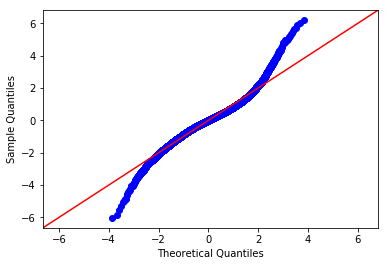

In [30]:
#QQ Plot of residuals
sm.graphics.qqplot(version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 3 conclusion:
         -Applied Model Fit: Stepwise selection. Same model as version2 resulted after running Stepwise selection
         -Residuals do not follow a normal distribution, therefore, model is not reliable
       

### 2.4 Test Model

In [31]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [32]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [33]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [34]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.04780623906412759
Test Mean Squarred Error: 114.51564698336733


### 2.5 Conclusions: Model 1

 In general, eventhough R-squared and Adjusted R-squared showed good numbers (0.827), the different QQ Plots from Model 1 were not very satisfactory (residuals are very far from following a normal distribution). Also, the difference of the Mean Squared Error between train data and test data is big, therefore Model 1 is overfitting and not reliable.
 
**Train Mean Squarred Error:** 0.04825382071143869

**Test Mean Squarred Error:** 115.4504831237798


         

# 3. Model 2: What School District has the best house appraisal? 
*Created School District Bins based on zipcodes
*This model only takes into account location and sqft living/lot

### 3.1 Import School District dataframe and prepare Model 2 dataframe 

Model 2 will use School Districts to perform analysis. School Districts were obtained based on Zipcode from original dataframe

1. Got the city name and zip code from this webpage: https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA
2. Got King County School Districts from this webpage: https://www.kingcounty.gov/~/media/depts/elections/elections/maps/school-district-maps/school-districts.ashx?la=en
3. Put together "Schooldistrictcsv.csv" file to retrieve School District based on Zip Code. This file can be found in my GitHub repository

In [35]:
#Create a copy of dataframe to work on Model 2
df2 = df.copy()

Import Schooldistrictcsv.csv data to a pandas dataframe, prepare data and merge into the main dataframe for Model 2

In [36]:
df_SchoolDist = pd.read_csv('Schooldistrictcsv.csv')

In [37]:
#Rename column to perform join properly
df_SchoolDist.rename(columns={"Zip_code": "zipcode"}, inplace=True)

In [38]:
#Change data type on df_SchoolDist to merge
df_SchoolDist['zipcode'] = df_SchoolDist['zipcode'].astype('category')
df_SchoolDist['School_District'] = df_SchoolDist['School_District'].astype('category')
df_SchoolDist['City'] = df_SchoolDist['City'].astype('category')

In [39]:
#Merge dataframes to have School District and city data incorporated in main dataframe
df3 = df2.merge(df_SchoolDist, on='zipcode')

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 23 columns):
id                 21420 non-null int64
date               21420 non-null datetime64[ns]
price              21420 non-null float64
bedrooms           21420 non-null int64
bathrooms          21420 non-null float64
sqft_living        21420 non-null int64
sqft_lot           21420 non-null int64
floors             21420 non-null float64
waterfront         21420 non-null category
view               21420 non-null category
condition          21420 non-null category
grade              21420 non-null category
sqft_above         21420 non-null int64
sqft_basement      21420 non-null float64
yr_built           21420 non-null int64
yr_renovated       21420 non-null category
zipcode            21420 non-null int64
lat                21420 non-null float64
long               21420 non-null float64
sqft_living15      21420 non-null int64
sqft_lot15         21420 non-null int64
City           

In [41]:
df3.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,School_District
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Bryn Mawr-Skyway,Renton
1,4060000240,2014-06-23,205425.0,2,1.0,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,Bryn Mawr-Skyway,Renton


### 3.2 Select variables and create dummies for Model 2

In [42]:
#Create dummies for each School District
School_District_dummies = pd.get_dummies(df3['School_District'], prefix='SchDist')

In [43]:
#Select the dataframe for Model 1: dummy variables for every School District
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories

### 3.3 Train/test split

*  Use Scikit-Learn library:  train_test_split method to train/test split our dataset

In [44]:
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 20) (17136,)
(4284, 20) (4284,)


### 3.4 Generate Model 2 and perform feature engineering

#### Model 2 - version 1

In [45]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1666.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:27:15   Log-Likelihood:            -2.3514e+05
No. Observations:               17136   AIC:                         4.703e+05
Df Residuals:                   17116   BIC:                         4.705e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.557e+04   4719.599    -16.011      0.000   -8.48e+04   -6.63e+04
sqft_lot                      0.2177      0.048      4.558      0.000       0.124       0.311
sqft_living                 272.9075      1.986    137.441      0.000     269.015     276.800
SchDist_Auburn            -1.768e+05   1.05e+04    -16.871      0.000   -1.97e+05   -1.56e+05
SchDist_Bellevue           2.862e+05   6792.662     42.132      0.000    2.73e+05       3e+05
SchDist_Enumclaw          -1.207e+05   1.33e+04     -9.107      0.000   -1.47e+05   -9.47e+04
SchDist_Federal Way       -1.614e+05   6740.320    -23.950      0.000   -1.75e+05   -1.48e+05
SchDist_Highline          -3.682e+04   9202.788     -4.001      0.000   -5.49e+04   -1.88e+04
SchDist_Issaquah           2.771e+04   8865.356      3.125      0.002    1.03e+04    4.51e+04
SchDist_Kent              -1.517e+05   6326.331    -23.972      0.000   -1.64e+05   -1.39e+05
SchDist_Lake Washington    7.947e+04   5182.238     15.336      0.000    6.93e+04    8.96e+04
SchDist_Mercer Island       4.36e+05   1.47e+04     29.694      0.000    4.07e+05    4.65e+05
SchDist_Northshore        -3.038e+04   7996.836     -3.799      0.000   -4.61e+04   -1.47e+04
SchDist_Renton            -8.424e+04   6743.551    -12.492      0.000   -9.75e+04    -7.1e+04
SchDist_Riveview          -8.363e+04   1.34e+04     -6.250      0.000    -1.1e+05   -5.74e+04
SchDist_Seattle            1.709e+05   3915.831     43.640      0.000    1.63e+05    1.79e+05
SchDist_Shoreline          5.007e+04   9100.167      5.502      0.000    3.22e+04    6.79e+04
SchDist_Snoqualmie Valley -7.376e+04   9933.611     -7.425      0.000   -9.32e+04   -5.43e+04
SchDist_Tahoma            -1.527e+05   9971.268    -15.310      0.000   -1.72e+05   -1.33e+05
SchDist_Tukwila           -8.547e+04   1.47e+04     -5.833      0.000   -1.14e+05   -5.68e+04
SchDist_Vashon Island       3.16e+04   2.29e+04      1.379      0.168   -1.33e+04    7.65e+04
==============================================================================
Omnibus:                    15494.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1475115.145
Skew:                           3.982   Prob(JB):                         0.00
Kurtosis:                      47.750   Cond. No.                     4.65e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Plot residuals of version1 to see if they follow a normal distribution

In [46]:
Mod2_version1_resid = linreg.resid

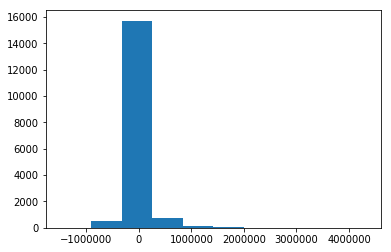

In [47]:
#Histogram of residuals
plt.hist(Mod2_version1_resid)
plt.show()

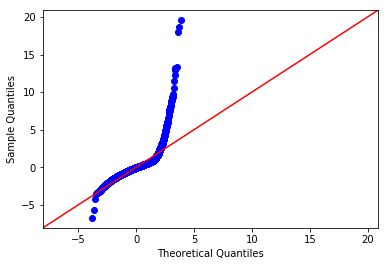

In [48]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Model 2 - version 2

Will drop variables with P-values > 0.05 (will have to split training/test data again after dropping variable) and will log transform variables to see if residuals follow a normal distribution

In [49]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Vashon Island'], axis=1) #dropping due to p-value

In [50]:
#Split data into train/test after dropping new variable
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 19) (17136,)
(4284, 19) (4284,)


In [51]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

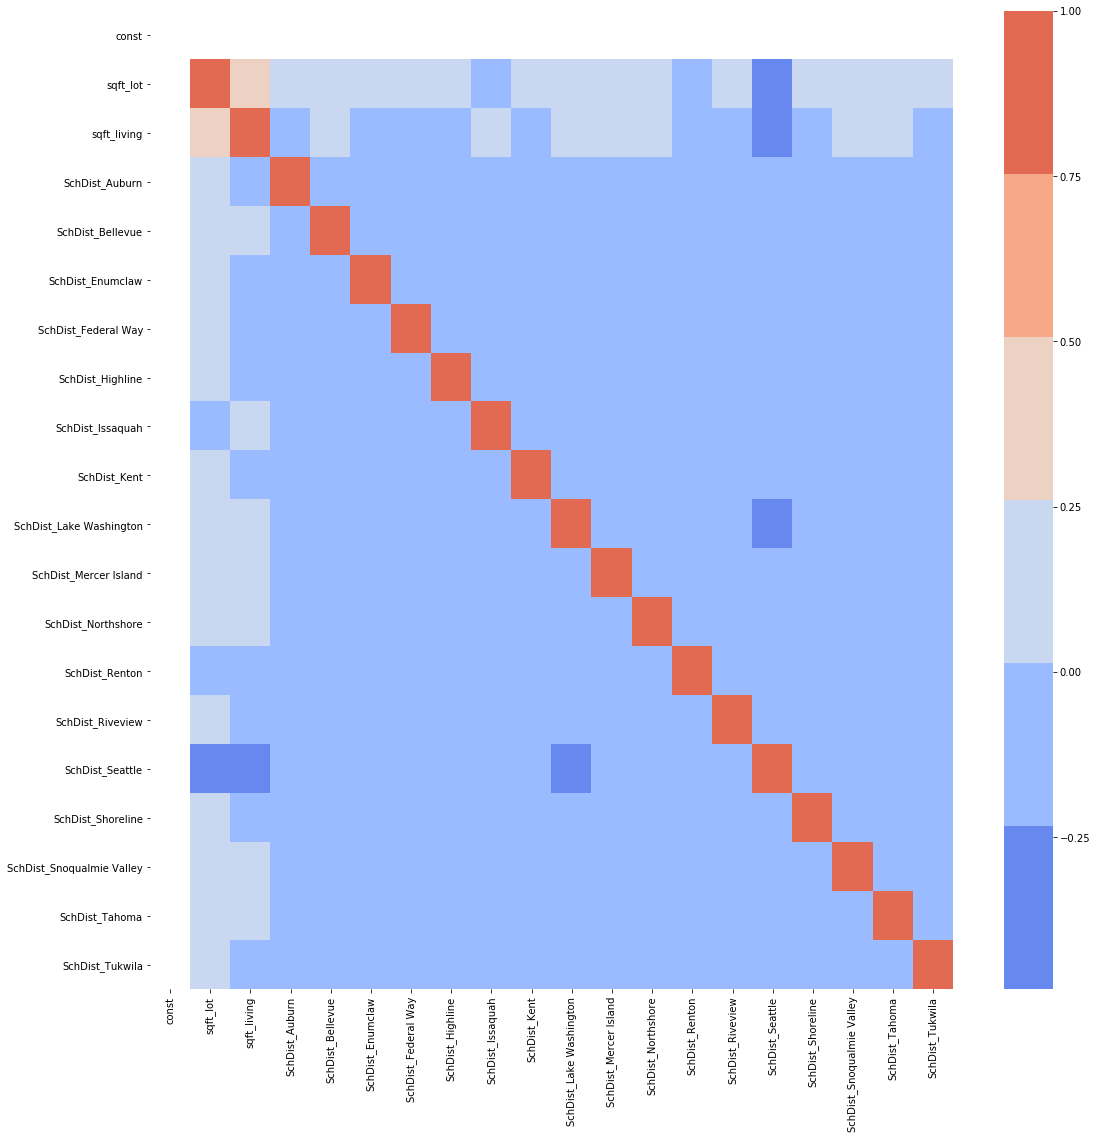

In [52]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [53]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2630.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:27:16   Log-Likelihood:                -1622.4
No. Observations:               17136   AIC:                             3285.
Df Residuals:                   17116   BIC:                             3440.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.7581      0.051    133.374      0.000       6.659       6.857
sqft_lot                      0.0457      0.003     16.566      0.000       0.040       0.051
sqft_living                   0.7766      0.005    146.171      0.000       0.766       0.787
SchDist_Auburn               -0.4790      0.030    -16.051      0.000      -0.537      -0.420
SchDist_Bellevue              0.3565      0.028     12.643      0.000       0.301       0.412
SchDist_Enumclaw             -0.3509      0.031    -11.144      0.000      -0.413      -0.289
SchDist_Federal Way          -0.4762      0.028    -16.913      0.000      -0.531      -0.421
SchDist_Highline             -0.2263      0.029     -7.743      0.000      -0.284      -0.169
SchDist_Issaquah              0.1017      0.029      3.463      0.001       0.044       0.159
SchDist_Kent                 -0.4118      0.028    -14.720      0.000      -0.467      -0.357
SchDist_Lake Washington       0.1595      0.028      5.765      0.000       0.105       0.214
SchDist_Mercer Island         0.5092      0.032     15.720      0.000       0.446       0.573
SchDist_Northshore           -0.0395      0.029     -1.382      0.167      -0.095       0.017
SchDist_Renton               -0.2162      0.028     -7.647      0.000      -0.272      -0.161
SchDist_Riveview             -0.1946      0.032     -6.146      0.000      -0.257      -0.133
SchDist_Seattle               0.2707      0.028      9.769      0.000       0.216       0.325
SchDist_Shoreline             0.0359      0.029      1.225      0.220      -0.022       0.093
SchDist_Snoqualmie Valley    -0.1153      0.029     -3.914      0.000      -0.173      -0.058
SchDist_Tahoma               -0.3377      0.030    -11.387      0.000      -0.396      -0.280
SchDist_Tukwila              -0.4514      0.033    -13.824      0.000      -0.515      -0.387
==============================================================================
Omnibus:                      677.106   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1908.335
Skew:                           0.146   Prob(JB):                         0.00
Kurtosis:                       4.609   Cond. No.                         674.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot residuals of version2 to see if they follow a normal distribution

In [54]:
Mod2_version2_resid = linreg.resid

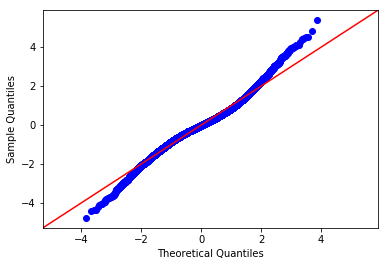

In [55]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Model 2 - version 3

Will drop variables with P-values > 0.05 from version 2. Follow same steps from Model 2 version 2

In [56]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Vashon Island'], axis=1) #dropping due to p-value from version 1
df_model2 = df_model2.drop(['SchDist_Northshore'], axis=1) #dropping due to p-value from version 2

In [57]:
#Split data into train/test after dropping new variable
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 18) (17136,)
(4284, 18) (4284,)


In [58]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

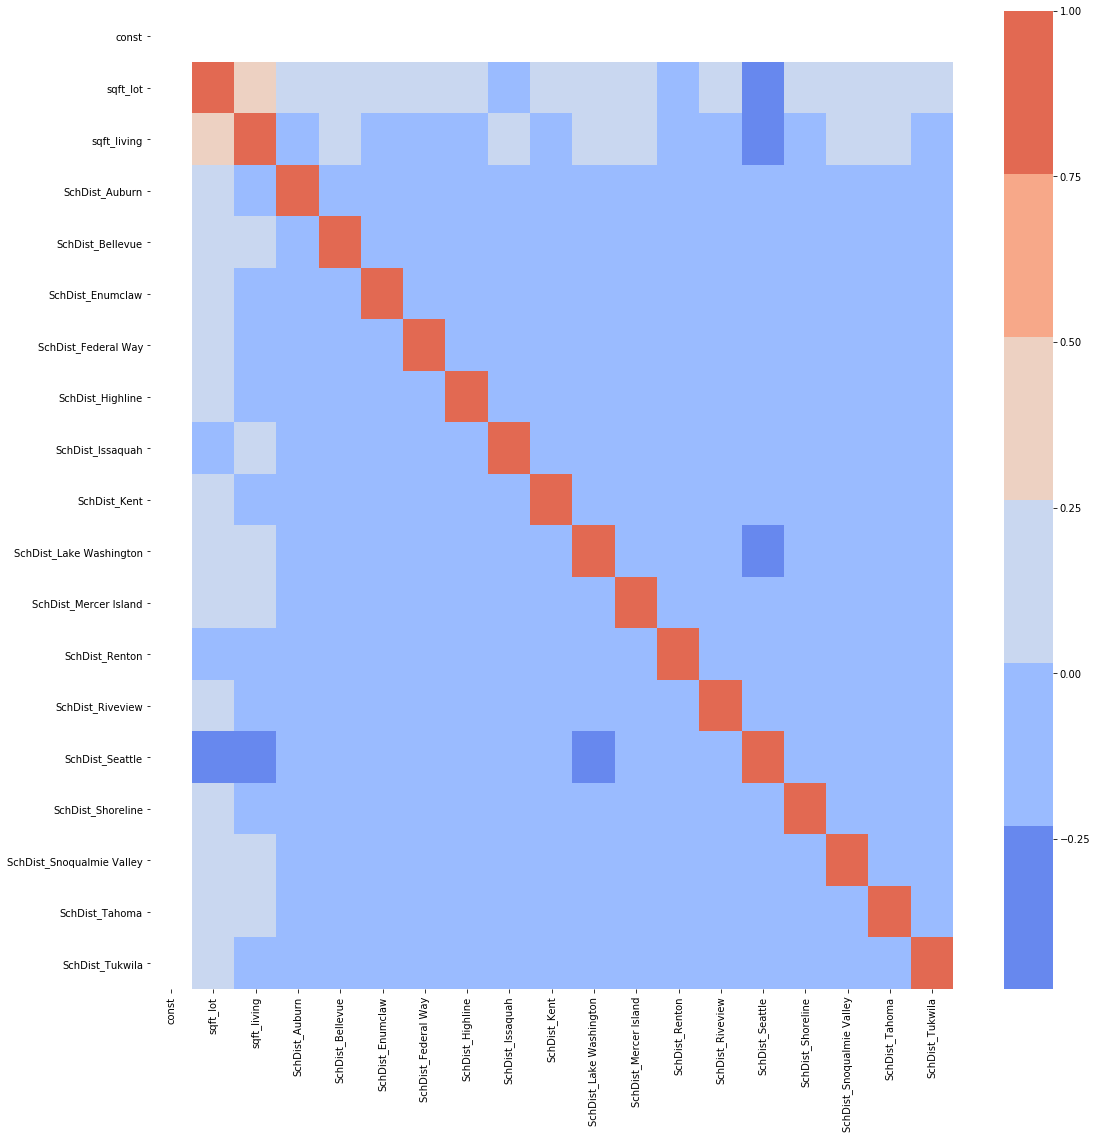

In [59]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [60]:
#Generate version3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     2801.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        05:27:18   Log-Likelihood:                -1657.1
No. Observations:               17136   AIC:                             3352.
Df Residuals:                   17117   BIC:                             3499.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.6714      0.044    152.992      0.000       6.586       6.757
sqft_lot                      0.0457      0.003     16.649      0.000       0.040       0.051
sqft_living                   0.7833      0.005    147.129      0.000       0.773       0.794
SchDist_Auburn               -0.4490      0.016    -28.462      0.000      -0.480      -0.418
SchDist_Bellevue              0.3945      0.012     32.560      0.000       0.371       0.418
SchDist_Enumclaw             -0.3026      0.019    -15.886      0.000      -0.340      -0.265
SchDist_Federal Way          -0.4387      0.012    -36.038      0.000      -0.463      -0.415
SchDist_Highline             -0.1894      0.015    -12.848      0.000      -0.218      -0.160
SchDist_Issaquah              0.1323      0.014      9.201      0.000       0.104       0.160
SchDist_Kent                 -0.3770      0.012    -31.953      0.000      -0.400      -0.354
SchDist_Lake Washington       0.1928      0.011     17.782      0.000       0.172       0.214
SchDist_Mercer Island         0.5503      0.020     27.462      0.000       0.511       0.590
SchDist_Renton               -0.1861      0.012    -15.171      0.000      -0.210      -0.162
SchDist_Riveview             -0.1619      0.019     -8.428      0.000      -0.200      -0.124
SchDist_Seattle               0.3079      0.010     29.378      0.000       0.287       0.328
SchDist_Shoreline             0.0767      0.014      5.292      0.000       0.048       0.105
SchDist_Snoqualmie Valley    -0.0746      0.015     -4.843      0.000      -0.105      -0.044
SchDist_Tahoma               -0.2956      0.015    -19.151      0.000      -0.326      -0.265
SchDist_Tukwila              -0.4072      0.021    -19.844      0.000      -0.447      -0.367
==============================================================================
Omnibus:                      678.267   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1921.803
Skew:                           0.143   Prob(JB):                         0.00
Kurtosis:                       4.615   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot residuals of version3 to see if they follow a normal distribution

In [61]:
Mod2_version3_resid = linreg.resid

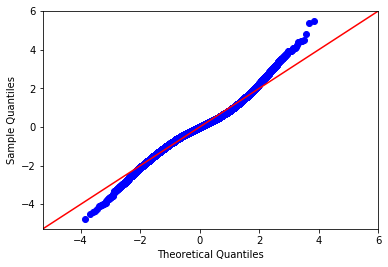

In [62]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Model 2 - version 4

Will perform Stepwise selection to see if the current model can be simplified

In [63]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  SchDist_Federal Way            with p-value 0.0
Add  SchDist_Seattle                with p-value 0.0
Add  SchDist_Bellevue               with p-value 0.0
Add  const                          with p-value 0.0
Add  SchDist_Lake Washington        with p-value 0.0
Add  SchDist_Mercer Island          with p-value 5.52247e-271
Add  SchDist_Kent                   with p-value 8.05319e-175
Add  SchDist_Auburn                 with p-value 1.8114e-130
Add  SchDist_Issaquah               with p-value 9.15661e-91
Add  SchDist_Shoreline              with p-value 1.45675e-79
Add  sqft_lot                       with p-value 1.44944e-74
Add  SchDist_Tukwila                with p-value 1.10507e-39
Add  SchDist_Tahoma                 with p-value 5.71762e-34
Add  SchDist_Enumclaw               with p-value 2.6137e-26
Add  SchDist_Renton                 with p-value 1.32675e-23
Add  SchDist_Highline               with p-value 5.6923e-26
Add  SchDis

In [68]:
feature_list = ['sqft_living', 'SchDist_Federal Way', 'SchDist_Seattle', 'SchDist_Bellevue', 'const', 'SchDist_Lake Washington', 'SchDist_Mercer Island', 'SchDist_Kent', 'SchDist_Auburn', 'SchDist_Issaquah', 'SchDist_Shoreline', 'sqft_lot', 'SchDist_Tukwila', 'SchDist_Tahoma', 'SchDist_Enumclaw', 'SchDist_Renton', 'SchDist_Highline', 'SchDist_Riveview', 'SchDist_Snoqualmie Valley']

No variables will be disposed due to Stepwise selection

### 3.5 Test Model

In [64]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [65]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [66]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [67]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0710425670397585
Test Mean Squarred Error: 0.06839371518060873


# Plot in map

In [114]:
x = df_model2.drop(['price'], axis=1)

X = sm.add_constant(x)

In [115]:
predicted_price = linreg.predict(X)

In [116]:
predicted_price = predicted_price.to_frame()

In [117]:
predicted_price.rename(columns={0: "predicted_price"}, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
x.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [118]:
lat_long = df3[['lat', 'long']].copy()

In [119]:
df5 = df_model2.merge(lat_long, how='inner', left_index=True, right_index=True)

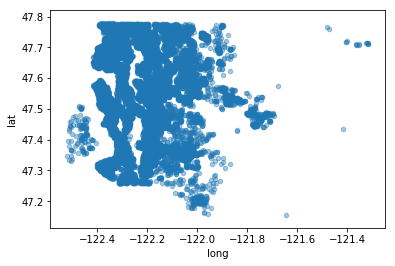

In [90]:
import matplotlib.pyplot as plt
df5.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show()

In [120]:
df6 = df5.merge(predicted_price, how='inner', left_index=True, right_index=True)

In [126]:
df6.describe()

,price,sqft_lot,sqft_living,SchDist_Auburn,SchDist_Bellevue,SchDist_Enumclaw,SchDist_Federal Way,SchDist_Highline,SchDist_Issaquah,SchDist_Kent,...,SchDist_Renton,SchDist_Riveview,SchDist_Seattle,SchDist_Shoreline,SchDist_Snoqualmie Valley,SchDist_Tahoma,SchDist_Tukwila,lat,long,predicted_price
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,1.512804e+04,2083.132633,0.025584,0.067414,0.015500,0.065406,0.033707,0.034127,0.076751,...,0.064753,0.014613,0.311391,0.032493,0.028105,0.027358,0.012325,47.560197,-122.213784,2330.200053
std,3.679311e+05,4.153080e+04,918.808412,0.157893,0.250743,0.123531,0.247247,0.180478,0.181560,0.266202,...,0.246094,0.119999,0.463073,0.177310,0.165275,0.163127,0.110334,0.138589,0.140791,2143.863748
min,7.800000e+04,5.200000e+02,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.155900,-122.519000,379.154566
25%,3.225000e+05,5.040000e+03,1430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.471200,-122.328000,1440.495557
50%,4.500000e+05,7.614000e+03,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.572100,-122.230000,1904.042405
75%,6.450000e+05,1.069050e+04,2550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.678100,-122.125000,2547.839505
max,7.700000e+06,1.651359e+06,13540.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.777600,-121.315000,76536.417383


TypeError: You must first set_array for mappable

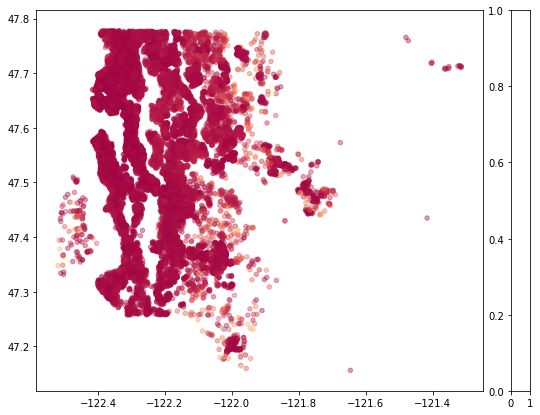

In [132]:
cmap = plt.cm.Spectral

scaled_pred_price = (df6['predicted_price']-min(df6['predicted_price']))/(max(df6['predicted_price'])-min(df6['predicted_price']))
norm = plt.Normalize(vmin=379.154566, vmax=76536.417383)

df6.plot(kind="scatter", x="long", y="lat", label="price",
    c=cmap(scaled_pred_price), cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [139]:
scaled_pred_price = (df6['predicted_price']-min(df6['predicted_price']))/(max(df6['predicted_price'])-min(df6['predicted_price']))
scaled_living = (df6['sqft_living']-min(df6['sqft_living']))/(max(df6['sqft_living'])-min(df6['sqft_living']))
df6['scaled_pred_price'] = scaled_pred_price
df6['scaled_sqft_living'] = scaled_living
# norm = plt.Normalize(vmin=379.154566, vmax=76536.417383)

# df6.plot(kind="scatter", x="long", y="lat", label="price",
#     c='scaled_pred_price', cmap=cmap,
#     colorbar=True, alpha=0.4, figsize=(10,7),
# )
# plt.legend()
# plt.show()

In [144]:
scaled_living = (df6['sqft_living']-min(df6['sqft_living']))/(max(df6['sqft_living'])-min(df6['sqft_living']))
df6['scaled_sqft_living'] = scaled_living

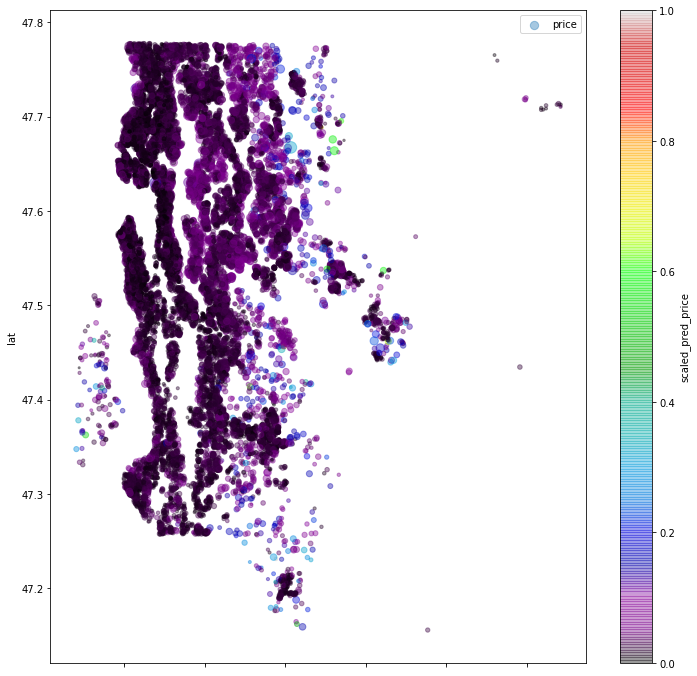

In [171]:
df6.plot(kind="scatter", x="long", y="lat", label="price", s=df6['sqft_living']/100,
    c='scaled_pred_price', cmap=plt.get_cmap("nipy_spectral"),
    colorbar=True, alpha=0.4, figsize=(12,12),
)
plt.legend()
plt.show()

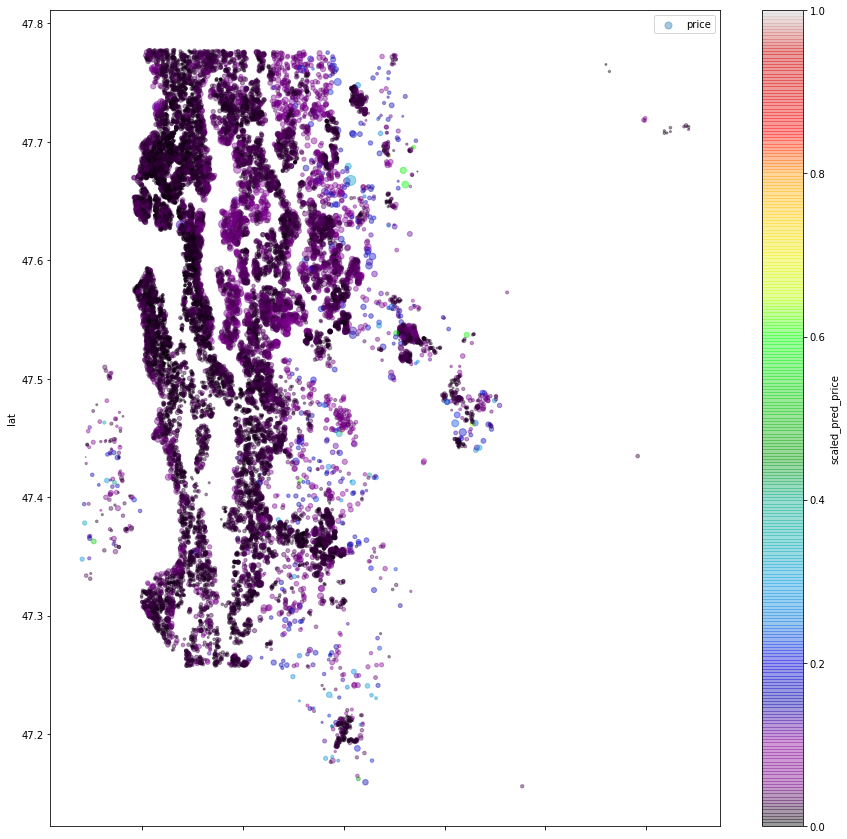

In [170]:
df6.plot(kind="scatter", x="long", y="lat", label="price", s=df6['scaled_sqft_living']*100,
    c='scaled_pred_price', cmap=plt.get_cmap("nipy_spectral"),
    colorbar=True, alpha=0.4, figsize=(15,15),
)
plt.legend()
plt.show()

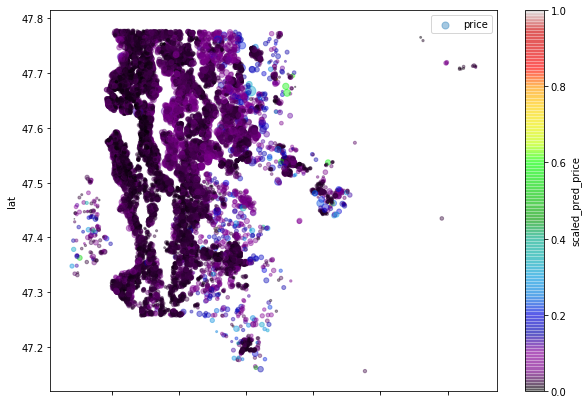

In [160]:
df6.plot(kind="scatter", x="long", y="lat", label="price", s=df6['scaled_sqft_living']*100,
    c='scaled_pred_price', cmap=plt.get_cmap("nipy_spectral"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.image as mpimg
# california_img=mpimg.imread('california.png')
# ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
#                        s=housing['population']/100, label="Population",
#                        c="median_house_value", cmap=plt.get_cmap("jet"),
#                        colorbar=False, alpha=0.4,
#                       )
# plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
# plt.ylabel("Latitude", fontsize=14)
# plt.xlabel("Longitude", fontsize=14)

# prices = housing["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar()
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

# plt.legend(fontsize=16)
# plt.show()